# Covid-19

Este [virus](https://en.wikipedia.org/wiki/Coronavirus_disease_2019) que se ha convertido en una pandemia global del siglo XXI y cuyo impacto en nuestras vidas está aún por determinar, nos servirá como excusa para ilustrar cómo usar [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/#) para analizar y visualizar datos abiertos relativos al covid-19.

## Fuentes de datos

Agradecer el trabajo realizado por las siguientes personas y organizaciones que han facilitado datos listos para ser analizados:

- [Our world in data](https://ourworldindata.org/) que ofrece datos globales en formato csv.
- [Datadista](https://github.com/datadista/datasets/tree/master/COVID%2019) para analizar por comunidad autónoma española.
- [Ramiro Aznar](https://ramiroaznar.carto.com/tables/spain_regions/public/map) por su mapa de España para visualizaciones.

## Situación global

Usaremos [pandas](http://pandas.pydata.org) para procesar la información obtenida.

In [1]:
import pandas as pd

Inspeccionamos la información almacenada en el *data frame* con la función **info**.

> Las funciones **head** y **tail** también nos pueden ser útiles.

In [2]:
csvurl = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
covid19df = pd.read_csv(csvurl)
covid19df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7605 entries, 0 to 7604
Data columns (total 6 columns):
date            7605 non-null object
location        7605 non-null object
new_cases       7605 non-null int64
new_deaths      7605 non-null int64
total_cases     7605 non-null int64
total_deaths    7605 non-null int64
dtypes: int64(4), object(2)
memory usage: 356.6+ KB


En principio nos interesa la siguiente información:

- país (*location*)
- casos por día (*new_cases*)
- defunciones por día (*new_deaths*)

> Otras columnas pueden calcularse a partir de esos datos.

Y vamos a eliminar los registros asociados a 'World' porque no es un país, sino un acumulado de los otros valores.

Consolidamos la información por país, y renombramos por comodidad al convertirse en totales.

In [3]:
covid19df[covid19df.location == 'World']

date location  new_cases  new_deaths  total_cases  total_deaths
7495  2019-12-31    World         27           0           27             0
7496  2020-01-01    World          0           0           27             0
7497  2020-01-02    World          0           0           27             0
7498  2020-01-03    World         17           0           44             0
7499  2020-01-04    World          0           0           44             0
...          ...      ...        ...         ...          ...           ...
7580  2020-03-25    World      38948        2200       417061         18565
7581  2020-03-26    World      51223        2426       468284         20991
7582  2020-03-27    World      59735        2681       528019         23672
7583  2020-03-28    World      63952        3318       591971         26990
7584  2020-03-29    World      65169        3461       657140         30451

[90 rows x 6 columns]

In [4]:
casos_por_pais_df = (covid19df[covid19df.location != 'World']
    .groupby('location', as_index=False)
    .sum())
casos_por_pais_df.rename(columns = {'new_cases': 'cases', 'new_deaths': 'deaths'}
                         , inplace=True)
casos_y_muertes_por_pais_df = casos_por_pais_df[['location','cases','deaths']]
casos_y_muertes_por_pais_df.head()

location  cases  deaths
0  Afghanistan    106       3
1      Albania    197      10
2      Algeria    409      26
3      Andorra    308       4
4       Angola      4       0

Como una imagen vale más que mil palabras, representemos los datos para algunos países.

In [5]:
import matplotlib.pyplot as plt
plt.close("all")

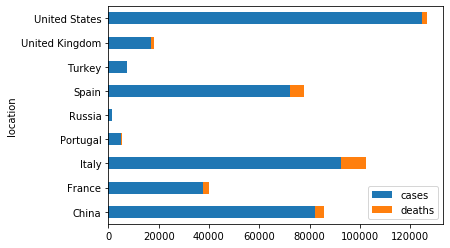

In [6]:
algunos_paises_df = casos_y_muertes_por_pais_df[casos_y_muertes_por_pais_df['location']
                                                .isin(['China', 
                                                       'Italy', 
                                                       'France', 
                                                       'Portugal', 
                                                       'Spain', 
                                                       'Turkey', 
                                                       'Russia', 
                                                       'United Kingdom', 
                                                       'United States'])]
algunos_paises_df.plot.barh(x='location', stacked=True);

Podemos observar que países como Italia o España, con una población muy inferior, tienen un número alarmantemente alto de muertes.

A continuación veamos aquellos países con mas de mil muertes registradas.

> Uso los paréntesis para poder dividir la operación en varias líneas para hacerla más legible.

In [7]:
aux_df = (casos_y_muertes_por_pais_df[casos_y_muertes_por_pais_df.deaths > 1000]
    .sort_values('deaths'))
aux_df

location   cases  deaths
186  United Kingdom   17089    1019
187   United States  124665    2191
63           France   37575    2314
87             Iran   35408    2517
38            China   82342    3306
166           Spain   72248    5690
92            Italy   92472   10023

In [8]:
paises = aux_df.location.to_numpy()
mas_de_mil_df = casos_y_muertes_por_pais_df[casos_y_muertes_por_pais_df['location']
                                                .isin(paises)]
mas_de_mil_df.plot.pie(subplots=True, 
                     y=['cases', 'deaths'], 
                     labels=paises, 
                     legend=False, 
                     figsize=(12, 8));

## España

A continuación vamos a centrarnos en nuestro país.

In [9]:
spain_df = covid19df.loc[covid19df['location'] == 'Spain']

In [10]:
spain_df.tail()

date location  new_cases  new_deaths  total_cases  total_deaths
6475  2020-03-25    Spain       6584         514        39673          2696
6476  2020-03-26    Spain       7937         738        47610          3434
6477  2020-03-27    Spain       8578         655        56188          4089
6478  2020-03-28    Spain       7871         769        64059          4858
6479  2020-03-29    Spain       8189         832        72248          5690

In [11]:
spn_df = spain_df[['date', 'total_cases', 'total_deaths']]

Veamos la evolución de nuevos casos reportados para los últimos treinta días.

A diferencia de los anteriores gráficos vamos a utizar la biblioteca [seaborn](https://seaborn.pydata.org/).

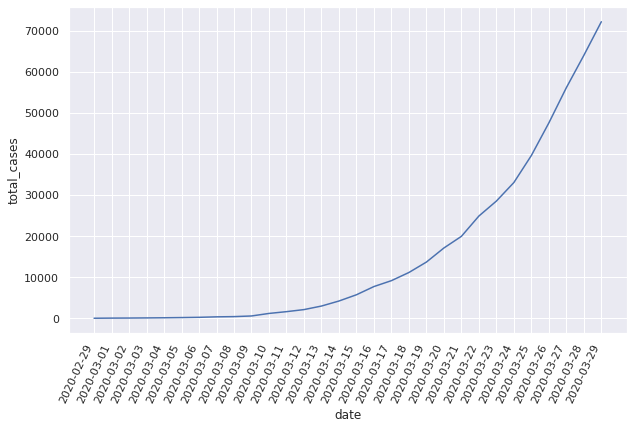

In [12]:
import seaborn as sns
sns.set()

plt.figure(figsize=(10, 6))
chart = sns.lineplot(x='date', y='total_cases', data=spn_df.tail(30))
plt.xticks(rotation=65, horizontalalignment='right');

In [13]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set_color_codes('pastel')
sns.barplot(x='date', y='new_cases', data=spain_df.tail(20), label='Diagnosticados', color='b');

sns.set_color_codes('muted')
sns.barplot(x='date', y='new_deaths', data=spain_df.tail(20), label='Defunciones', color='b');
plt.xticks(rotation=65, horizontalalignment='right');

ax.legend(ncol=2, loc="upper left", frameon=True)
sns.despine();

### Por comunidad autónoma

[Datadista](https://github.com/datadista/datasets/tree/master/COVID%2019) ha hecho un gran trabajo preparando los datos.

Y usaremos un mapa de España gracias a [Ramiro Aznar](https://ramiroaznar.carto.com/tables/spain_regions/public/map).

In [14]:
csv_url = 'https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_fallecidos_long.csv'
cas_df = pd.read_csv(csv_url)
cas_df.head()

fecha  cod_ine       CCAA  total
0  2020-03-03        1  Andalucía      0
1  2020-03-04        1  Andalucía      0
2  2020-03-05        1  Andalucía      0
3  2020-03-06        1  Andalucía      0
4  2020-03-07        1  Andalucía      0

In [15]:
import geopandas as gpd

In [16]:
shapefile = 'datasets/geo_maps/es/spain_regions.shp'
gdf = gpd.read_file(shapefile)
gdf.head()

cartodb_id cod_region                                 noml_ccaa  \
0          12         12            COMUNIDAD AUTONOMA DE LA RIOJA   
1           6         06  COMUNIDAD AUTONOMA DE CASTILLA-LA MANCHA   
2           1         01           COMUNIDAD AUTONOMA DE ANDALUCIA   
3           2         02              COMUNIDAD AUTONOMA DE ARAGON   
4          18         18  COMUNIDAD AUTONOMA DEL PRINCIPADO DE AST   

             nom_ccaa  created_at  updated_at  population  \
0            La Rioja  2014-09-30  2015-06-04    316798.0   
1  Castilla-La Mancha  2014-09-30  2015-06-04   2032863.0   
2           Andalucía  2014-09-30  2015-06-04   8414240.0   
3              Aragón  2014-09-30  2015-06-04   1319291.0   
4            Asturias  2014-09-30  2015-06-04   1022800.0   

                                            geometry  
0  POLYGON ((-2.99722947 42.64213931, -2.9951192 ...  
1  (POLYGON ((-2.90101905 41.32556463, -2.8979373...  
2  (POLYGON ((-5.035409062999974 38.7261894360000...  
3  POLYGON ((-0.7472659690000112 42.9223741649999...  
4  (POLYGON ((-5.840832535999993 43.6606188819999...

In [17]:
cas_df = cas_df[(cas_df.cod_ine != 0)]
cas_df_map = gdf.merge(cas_df, left_on='cartodb_id', right_on='cod_ine')

In [18]:
fig, ax = plt.subplots(1, 1)
cas_df_map.plot(column='total', ax=ax, legend=True);